<a href="https://colab.research.google.com/github/mthavril/stress-level-classification-nlp-ml/blob/main/Stress_Level_Classification_Using_NLP_and_Machine_Learning_Based_on_MLLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stress Level Classification Using NLP and Machine Learning Models Based on the Machine Learning Life Cycle (MLLC)**

**Author:** Muthia Mutmainah Aprinelia  
**Institution:** Institut Teknologi Garut (ITG)  
**Dataset Source:** Kaggle – Stress Level Dataset (Reddit-based)  
**Tools:** Python · Scikit-Learn · NLTK · Seaborn · Matplotlib · WordCloud  
**Notebook Type:** Google Colab  





 ## **1. DATA ACQUISITION**

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload dataset
uploded = files.upload()

Saving Reddit_Combi.xlsx to Reddit_Combi.xlsx


In [ ]:
# Load datase
df = pd.read_excel("Reddit_Combi.xlsx")
df.head()

,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1


In [ ]:
# Melihat ukuran dan struktur data
print("\n=== Data Overview ===")
print("Jumlah baris dan kolom:", df.shape)
print("\nInfo dataset:")
print(df.info())


=== Data Overview ===
Jumlah baris dan kolom: (3123, 4)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3123 non-null   object
 1   body        3113 non-null   object
 2   Body_Title  3123 non-null   object
 3   label       3123 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 97.7+ KB
None


In [ ]:
# Mengecek missing value
print("\Jumlah missing value per kolom:")
print(df.isnull().sum())

\Jumlah missing value per kolom:
title          0
body          10
Body_Title     0
label          0
dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
/tmp/ipython-input-648752369.py:2: SyntaxWarning: invalid escape sequence '\J'
  print("\Jumlah missing value per kolom:")


In [ ]:
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-383937429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


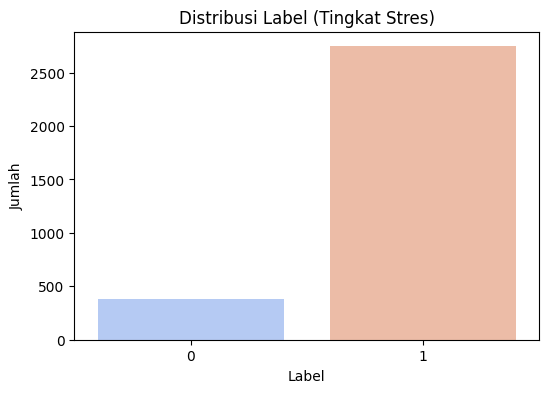

In [ ]:
# Distribusi tarhet (kolom 'label' jadi target)
if 'label' in df.columns:
  plt.figure(figsize=(6,4))
  sns.countplot(x='label', data=df, palette='coolwarm')
  plt.title("Distribusi Label (Tingkat Stres)")
  plt.xlabel('Label')
  plt.ylabel('Jumlah')
  plt.show()


Panjang teks rata-rata: 891.2145373038745


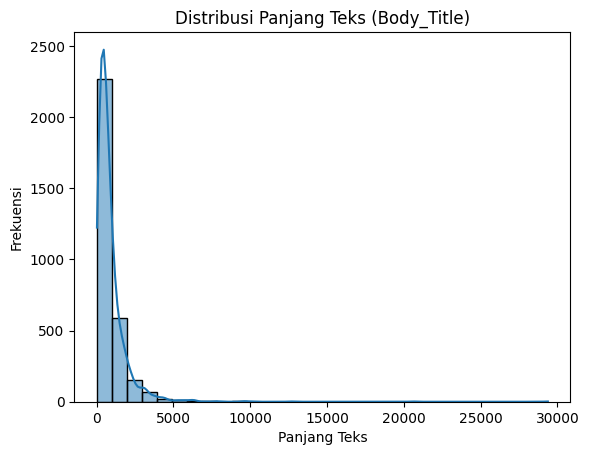

In [ ]:
# Panjang teks rata-rata (menggunakan kolom Body_Title)
if 'Body_Title' in df.columns:
  df['text_length'] = df['Body_Title'].astype(str).apply(len)
  print("\nPanjang teks rata-rata:", df['text_length'].mean())
  sns.histplot(df['text_length'], bins=30, kde=True)
  plt.title('Distribusi Panjang Teks (Body_Title)')
  plt.xlabel('Panjang Teks')
  plt.ylabel('Frekuensi')
  plt.show()

## **2. DATA PREPROCESSING**

### **2.1. Text Cleaning**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['Body_Title'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### **2.2 Lemmatization + Stopword Removal**

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['clean_text'].apply(preprocess_text)
print("\n=== Contoh Sebelum & Sesudah Preprocessing ===")
sample = df[['Body_Title', 'processed_text']].head(5)
sample




=== Contoh Sebelum & Sesudah Preprocessing ===


,Body_Title,processed_text
0,Envy to other is swallowing me Im from develop...,envy swallowing im developingcountry indonesia...
1,Nothin outta the ordinary. Paradise. Job stres...,nothin outta ordinary paradise job stress life...
2,Almost 49 and the chasm of emptiness has never...,almost chasm emptiness never greater ive diagn...
3,I’m happy again After my closest friend left m...,im happy closest friend left april finally let...
4,Is it possible to recover from such a traumati...,possible recover traumatic childhood yet feel ...


### **2.3. TF-IDF Vectorization (Mengubah Teks ke Numerik)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\n=== Contoh Hasil TF-IDF (20 Fitur Teratas) ===")
tfidf_df.head(10)



=== Contoh Hasil TF-IDF (20 Fitur Teratas) ===


,cant,day,dont,even,feel,friend,get,im,ive,know,life,like,one,people,really,thing,time,want,work,year
0,0.173754,0.000000,0.000000,0.000000,0.000000,0.000000,0.158405,0.240924,0.000000,0.000000,0.334487,0.136160,0.000000,0.000000,0.000000,0.000000,0.000000,0.171886,0.407936,0.748529
1,0.152829,0.052788,0.341271,0.210064,0.000000,0.000000,0.185771,0.600409,0.154016,0.191384,0.098068,0.119762,0.112061,0.280864,0.106939,0.000000,0.046889,0.000000,0.478410,0.000000
2,0.000000,0.000000,0.000000,0.218880,0.000000,0.000000,0.387136,0.000000,0.641919,0.199417,0.204368,0.000000,0.467056,0.000000,0.000000,0.000000,0.195426,0.000000,0.000000,0.228672
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.721371,0.000000,0.404763,0.000000,0.000000,0.561952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.519322,0.000000,0.504660,0.000000,0.000000,0.143319,0.208329,0.000000,0.397954,0.323992,0.227368,0.000000,0.216977,0.000000,0.000000,0.000000,0.000000,0.222640
5,0.000000,0.123640,0.499575,0.000000,0.097094,0.000000,0.108777,0.248165,0.000000,0.000000,0.344540,0.467509,0.000000,0.131567,0.250472,0.000000,0.109822,0.472138,0.000000,0.000000
6,0.688441,0.000000,0.192164,0.000000,0.000000,0.000000,0.000000,0.159096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681037,0.000000,0.000000
7,0.000000,0.256988,0.000000,0.000000,0.000000,0.000000,0.000000,0.343878,0.000000,0.000000,0.238712,0.388692,0.000000,0.000000,0.000000,0.000000,0.456534,0.245338,0.582259,0.000000
8,0.000000,0.000000,0.000000,0.221838,0.175112,0.265889,0.196183,0.447573,0.433728,0.404223,0.000000,0.000000,0.000000,0.000000,0.225867,0.226192,0.396134,0.000000,0.000000,0.000000
9,0.439728,0.000000,0.000000,0.151102,0.119275,0.000000,0.133628,0.711338,0.147714,0.000000,0.423251,0.000000,0.000000,0.000000,0.000000,0.154068,0.000000,0.145000,0.000000,0.000000


### **2.4. WordCloud dari Hasil Preprocessing**

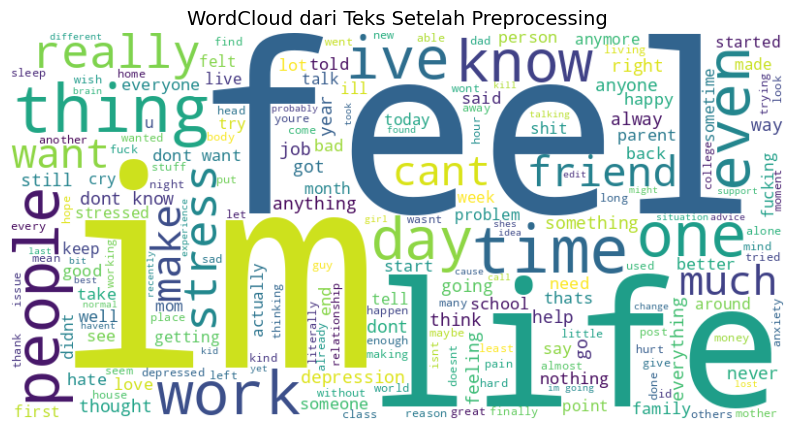

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Teks Setelah Preprocessing', fontsize=14)
plt.show()

### **2.5. Distribusi Panjang Teks Setelah Preprocessing**

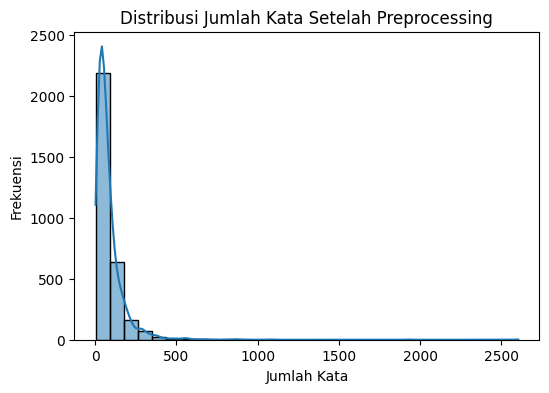

In [ ]:
import seaborn as sns

df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Kata Setelah Preprocessing')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
df[['Body_Title', 'clean_text', 'processed_text', 'word_count']].head()

,Body_Title,clean_text,processed_text,word_count
0,Envy to other is swallowing me Im from develop...,envy to other is swallowing me im from develop...,envy swallowing im developingcountry indonesia...,114
1,Nothin outta the ordinary. Paradise. Job stres...,nothin outta the ordinary paradise job stress ...,nothin outta ordinary paradise job stress life...,389
2,Almost 49 and the chasm of emptiness has never...,almost and the chasm of emptiness has never be...,almost chasm emptiness never greater ive diagn...,55
3,I’m happy again After my closest friend left m...,im happy again after my closest friend left me...,im happy closest friend left april finally let...,14
4,Is it possible to recover from such a traumati...,is it possible to recover from such a traumati...,possible recover traumatic childhood yet feel ...,138


## **3. TRAINING & EVALUATION MODEL**

### **3.1. MODEL A - LOGISTIC REGRESSION**

=== Logistic Regression ===
Accuracy: 90.40%
Precision: 90.41%
Recall: 99.64%
F1-score: 94.80%


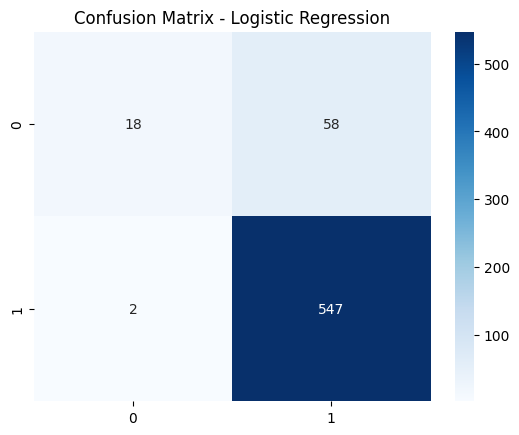

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Split data
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = df['processed_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Pipeline
logreg_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
    ])

# Train & Predict
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)*100
prec = precision_score(y_test, y_pred)*100
rec = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

print("=== Logistic Regression ===")
print(f"Accuracy: {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall: {rec:.2f}%")
print(f"F1-score: {f1:.2f}%")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Simpan hasil
logreg_results = {'Model' : 'Logistic Regresssion', 'Accuracy' : acc, 'Precision' : prec,'Recall' : rec, 'F1-score' : f1 }


### **3.2. MODEL B - RANDOM FOREST**

=== Random Forest ===
Accuray: 88.80%
Precision: 89.07%
Recall: 99.45%
F1-score: 93.98%


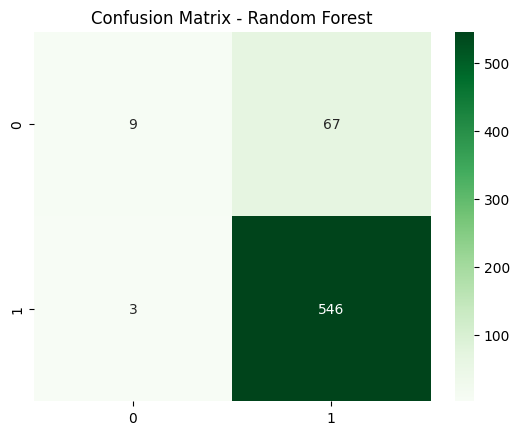

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = df['processed_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
prec = precision_score(y_test, y_pred)*100
rec = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

print("=== Random Forest ===")
print(f"Accuray: {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall: {rec:.2f}%")
print(f"F1-score: {f1:.2f}%")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

rf_results = {'Model': 'Random Forest', 'Accuracy': acc, 'Precision':prec, 'Recall': rec, 'F1-score': f1}


### **3.3. MODEL C - SVM**

=== SVM (Linear) ===
Accuracy: 92.80%
Precision: 93.60%
Recall: 98.54%
F1-score: 96.01%


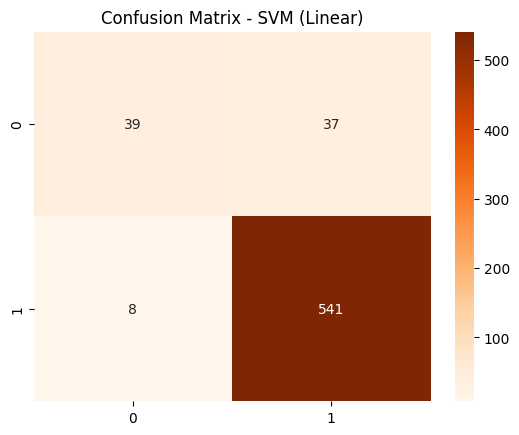

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = df['processed_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

svm_pipeline = Pipeline([
    ('tfidf',  vectorizer),
    ('model', SVC(kernel='linear', probability=True, random_state=42))
])

svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
prec = precision_score(y_test, y_pred)*100
rec = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

print("=== SVM (Linear) ===")
print(f"Accuracy: {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall: {rec:.2f}%")
print(f"F1-score: {f1:.2f}%")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM (Linear)")
plt.show()

svm_results = {'Model': 'SVM (Linear)', 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

### **3.4. MODEL D - MLP CLASSIFIER**

=== MLP Classifier ===
Accuracy: 92.16%
Precision: 93.10%
Recall: 98.36%
f1-score: 95.66%


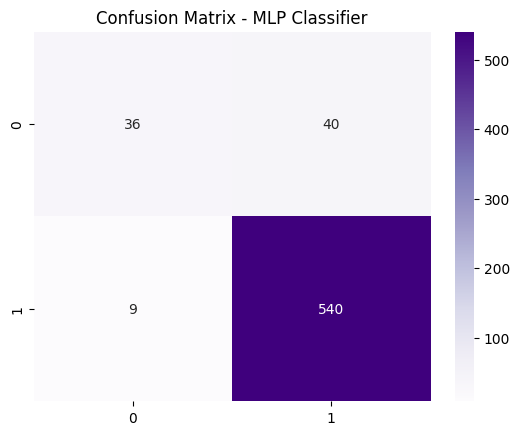

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

voctorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = df['processed_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

mlp_pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('model', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42))
])

mlp_pipeline.fit(X_train, y_train)
y_pred = mlp_pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)*100
prec = precision_score(y_test, y_pred)*100
rec = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

print("=== MLP Classifier ===")
print(f"Accuracy: {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall: {rec:.2f}%")
print(f"f1-score: {f1:.2f}%")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - MLP Classifier")
plt.show()

mlp_results = {'Model': 'MLP Classifier', 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

### **3.5. PERFORMA SEMUA MODEL**


=== pERBANDINGAN PERFORMA SEMUA MODEL ===
                  Model  Accuracy  Precision     Recall   F1-score
2          SVM (Linear)     92.80  93.598616  98.542805  96.007098
3        MLP Classifier     92.16  93.103448  98.360656  95.659876
0  Logistic Regresssion     90.40  90.413223  99.635701  94.800693
1         Random Forest     88.80  89.070147  99.453552  93.975904


/tmp/ipython-input-3044273443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')


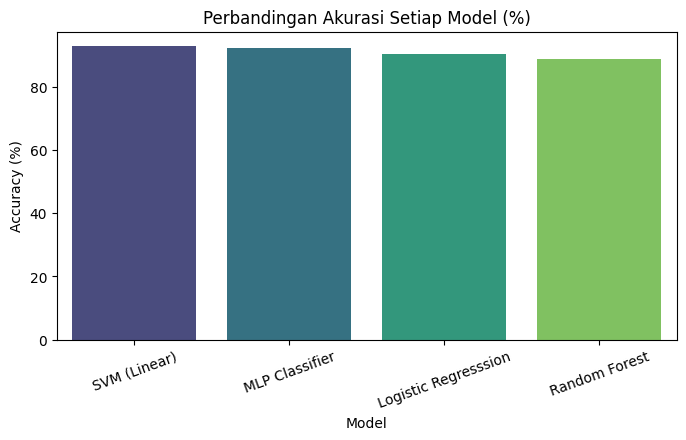

In [ ]:
import pandas as pd
results_df = pd.DataFrame([logreg_results, rf_results, svm_results, mlp_results])
results_df = results_df.sort_values(by='F1-score', ascending=False)

print("\n=== pERBANDINGAN PERFORMA SEMUA MODEL ===")
print(results_df)

plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title("Perbandingan Akurasi Setiap Model (%)")
plt.ylabel("Accuracy (%)")

plt.xticks(rotation=20)
plt.show()